In [1]:
import fastf1
import fastf1.plotting
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import plotly.express as px
import warnings
# The misc_mpl_mods option enables minor grid lines which clutter the plot
#fastf1.plotting.setup_mpl(misc_mpl_mods=True)
fastf1.plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False, color_scheme='fastf1')
warnings.filterwarnings('ignore')

Load the race session

In [2]:
# sessions: FPX, Q, R
race = fastf1.get_session(2025, "China", 'R')
race.load();

req         WARNING 	DEFAULT CACHE ENABLED! (95.49 MB) C:\Users\ivano\AppData\Local\Temp\fastf1
core           INFO 	Loading data for Chinese Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['81', '4', '63', '1', '31', '12', '23', '87', '18', '55', '6', '30', '7', '5', '27

Get all the laps for the point finishers only. Filter out slow laps (yellow flag, VSC, pitstops etc.) as they distort the graph axis.

In [3]:
point_finishers = race.drivers
print(point_finishers)
driver_laps = race.laps.pick_drivers(point_finishers).pick_quicklaps()

driver_laps = driver_laps.reset_index()

['81', '4', '63', '1', '31', '12', '23', '87', '18', '55', '6', '30', '7', '5', '27', '22', '14', '16', '44', '10']


To plot the drivers by finishing order, we need to get their three-letter abbreviations in the finishing order.

In [4]:
finishing_order = [race.get_driver(i)["Abbreviation"] for i in point_finishers]
print(finishing_order)

['PIA', 'NOR', 'RUS', 'VER', 'OCO', 'ANT', 'ALB', 'BEA', 'STR', 'SAI', 'HAD', 'LAW', 'DOO', 'BOR', 'HUL', 'TSU', 'ALO', 'LEC', 'HAM', 'GAS']


We need to modify the DRIVER_COLORS palette. Its keys are the driver’s full names but we need the keys to be the drivers’ three-letter abbreviations. We can do this with the DRIVER_TRANSLATE mapping.

In [5]:
driver_colors = {abv: fastf1.plotting.DRIVER_COLORS [driver] for abv, driver in fastf1.plotting.DRIVER_TRANSLATE.items()}
print(driver_colors)


{'LEC': '#dc0000', 'SAI': '#ff8181', 'SHW': '#9c0000', 'VER': '#fcd700', 'PER': '#ffec7b', 'DEN': '#907400', 'PIA': '#ff8700', 'NOR': '#eeb370', 'OWA': '#ee6d3a', 'GAS': '#fe86bc', 'OCO': '#ff117c', 'DOO': '#894667', 'BOT': '#00e701', 'ZHO': '#008d01', 'POU': '#004601', 'DEV': '#1e3d61', 'TSU': '#356cac', 'RIC': '#2b4562', 'LAW': '#2b4562', 'HAD': '#1e6176', 'IWA': '#1e6176', 'MAG': '#ffffff', 'HUL': '#cacaca', 'BEA': '#c40000', 'ALO': '#006f62', 'STR': '#00413b', 'DRU': '#2f9b90', 'HAM': '#00d2be', 'RUS': '#24ffff', 'VES': '#00a6ff', 'ALB': '#005aff', 'SAR': '#012564', 'OSU': '#1b3d97', 'COL': '#639aff'}


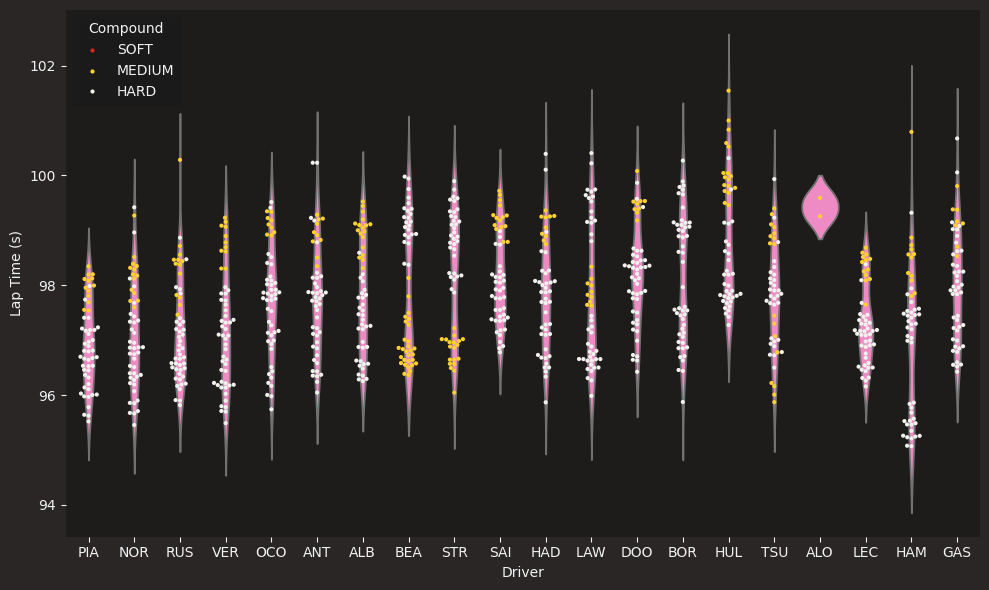

In [6]:
# create the figure
fig, ax = plt.subplots(figsize=(10, 6))

# Seaborn doesn't have proper timedelta support
# so we have to convert timedelta to float (in seconds)
driver_laps["LapTime(s)"] = driver_laps["LapTime"].dt.total_seconds()

sns.violinplot(data=driver_laps,
               x="Driver",
               y="LapTime(s)",
               inner=None,
               density_norm="area",
               order=finishing_order,
               #palette=driver_colors,
               #hue="Driver"
               )

sns.swarmplot(data=driver_laps,
              x="Driver",
              y="LapTime(s)",
              order=finishing_order,
              hue="Compound",
              palette=fastf1.plotting.COMPOUND_COLORS,
              hue_order=["SOFT", "MEDIUM", "HARD"],
              linewidth=0,
              s=3,
              )

ax.set_xlabel("Driver")
ax.set_ylabel("Lap Time (s)")

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

First create the violin plots to show the distributions. Then use the swarm plot to show the actual laptimes.

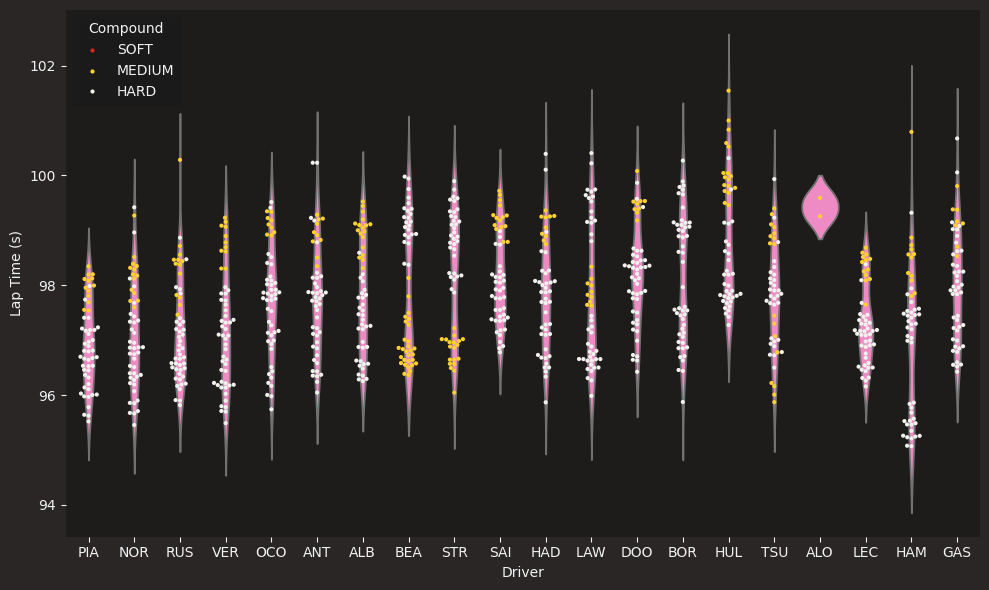

In [7]:
# create the figure
fig, ax = plt.subplots(figsize=(10, 6))

# Seaborn doesn't have proper timedelta support
# so we have to convert timedelta to float (in seconds)
driver_laps["LapTime(s)"] = driver_laps["LapTime"].dt.total_seconds()

sns.violinplot(data=driver_laps,
               x="Driver",
               y="LapTime(s)",
               inner=None,
               density_norm="area",
               order=finishing_order,
               #palette=driver_colors,
               #hue="Driver"
               )

sns.swarmplot(data=driver_laps,
              x="Driver",
              y="LapTime(s)",
              order=finishing_order,
              hue="Compound",
              palette=fastf1.plotting.COMPOUND_COLORS,
              hue_order=["SOFT", "MEDIUM", "HARD"],
              linewidth=0,
              s=3,
              )

ax.set_xlabel("Driver")
ax.set_ylabel("Lap Time (s)")

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show();

In [8]:
loop_drivers = ['VER','LAW','SAI','LEC','RUS','HAM','NOR','PIA']
driver_laps_all = pd.DataFrame()
for driver in loop_drivers:
    driver_laps = pd.DataFrame()
    driver_laps = race.laps.pick_accurate().pick_driver(driver ).reset_index()
    driver_laps['LapTimeS'] = driver_laps.LapTime.dt.total_seconds()
    driver_laps['Driver'] = driver
    driver_laps_all = pd.concat([driver_laps_all,driver_laps], ignore_index=True)

driver_laps_all[['Driver','LapNumber','LapTimeS']]

,Driver,LapNumber,LapTimeS
0,VER,2.0,98.304
1,VER,3.0,98.302
2,VER,4.0,98.614
3,VER,5.0,98.895
4,VER,6.0,98.779
...,...,...,...
415,PIA,52.0,95.780
416,PIA,53.0,95.520
417,PIA,54.0,95.641
418,PIA,55.0,95.976


In [9]:
g=px.line(driver_laps_all, x='LapNumber', y='LapTimeS', color='Driver', hover_data=['LapTimeS'])
#formatting options
g.update_layout(title={
        'text': f'Lap times by driver',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        autosize=False,
        width=1200,
        height=400,
        )
g.show()
